## Import Libraries

In [1]:
import numpy as np
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

# used to access STAC catalogs
from pystac_client import Client
# used to sign items from teh NPC STAC catalog
import planetary_computer

# other libraries for nice outputs
from IPython.display import Image

## Data Search
### The `io-biodiversity` collection

In [2]:
# access catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
# make a bbox using Pheonix Subdivision coords
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]


# search 
search = catalog.search(
    collections=["io-biodiversity"],
    bbox = bbox,
    datetime = "2017/2020" # time range
)

In [15]:
# get items from search
items = search.item_collection()
print(f'There are {len(items)} items in the search.')

There are 4 items in the search.


## Phoenix Subdivision Map

In [31]:
item = items[0]
item

id: bii_2020_34.74464974521749_-115.38597824385106_cog
"bbox: [-115.3859782, 27.565314, -108.2066425, 34.7446497]"
datetime: None
proj:epsg: 4326
"proj:shape: [7992, 7992]"
end_datetime: 2020-12-31T23:59:59Z
"proj:transform: [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0]"
start_datetime: 2020-01-01T00:00:00Z
https://stac-extensions.github.io/projection/v1.0.0/schema.json
https://stac-extensions.github.io/raster/v1.1.0/schema.json
https://stac-extensions.github.io/version/v1.1.0/schema.json


In [14]:
for key in item.assets.keys():
    print(key, '--', item.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [34]:
# plot rendered preview
Image(url=item.assets['rendered_preview'].href, width=500)

In [35]:
phoenix = rioxr.open_rasterio(item.assets['rendered_preview'].href)
phoenix

/srv/conda/envs/notebook/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


<xarray.DataArray (band: 4, y: 1024, x: 1024)>
[4194304 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
  * y            (y) float64 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

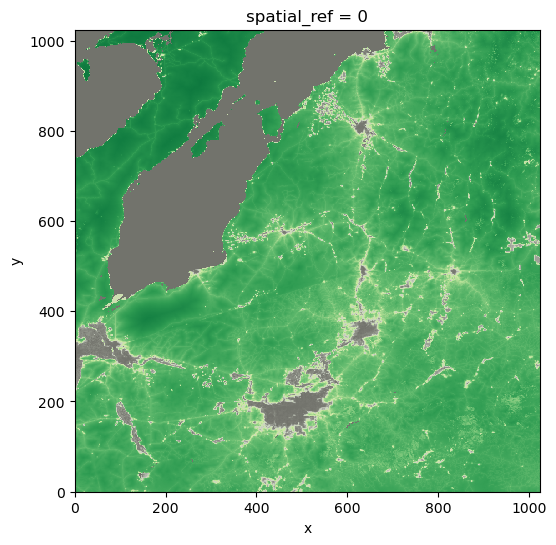

In [37]:
# plot raster with correct ratio
size = 6 # height in in of plot height
aspect = phoenix.rio.width / phoenix.rio.height 
# select R,G,B bands and plot
phoenix.sel(band=[1,2,3]).plot.imshow(size=size, aspect=aspect)